In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

operacao = pd.read_csv('websvc_error1.csv')

In [2]:
#Lista todos os elementos da coluna operacao
lista_com_todos = []
for x in range(operacao.index.max()):
    lista_com_todos.append(operacao.operacao.loc[(operacao.operacao.index==x)].str.split())

#Lista todos os elementos que tem algum fsan
lista_com_fsan = []
for x in range(operacao.index.max()):
    if 'fsan' in lista_com_todos[x][x]:
        lista_com_fsan.append(lista_com_todos[x][x])

#Lista apenas o valor do fsan
lista_fsan = []
for c in range(len(lista_com_fsan)):
    for x in range(len(lista_com_fsan[c])):
        if 'fsan' in lista_com_fsan[c][x] and 'dslam_fsan_status:' not in lista_com_fsan[c][x]:
            lista_fsan.append(lista_com_fsan[c][x+1])

#Remove valores repetidos ou sujos
fsan = []
for item in lista_fsan:
    if item.endswith(':'):
        item = item[:-1]
    if item not in fsan:
        fsan.append(item)

#Cria uma sequência de todas as operaçãoes com determinado fsan
sequencia = []
for c in fsan:
    lista = []
    for x in operacao.operacao:
        if c in x or c+':' in x:
            lista.append(x)
    sequencia.append(lista)

#Cria um dataframe para cada sequência de acontecimentos
lista_data = []
for x in sequencia:
    lista_data.append(pd.DataFrame(x))

#Nomeia a coluna de cada dataframe com o valor do fsan
for x in range(len(lista_data)):
    lista_data[x].columns = [fsan[x]]
    
#Lista a ultima mensagem para cada operação
ultima_msg = []
for x in range(len(lista_data)):
    ultima_msg.append(lista_data[x].loc[lista_data[x].index.max(), fsan[x]])

#   

# Estatísticas gerais

In [3]:
operacoes = len(lista_com_fsan) #Retorna quantidade de operações

fsans = len(fsan) #Retorna numero de fsans

media = len(lista_com_fsan) / len(fsan) #Retorna media de operações por fsan

maior = [] 
for item in lista_data:
    maior.append(item.index.max()) #Retorna a fsan com maior número de operações
res_maior = max(maior)

data_stats_sucess = {
    'Parâmetro': ['Quantidade de operações', 'Quantidade de fsans', 'Média de operações por fsan', 'Maior número de operações em uma fsan' ],
    'Quantidade': [int(operacoes), int(fsans), int(media), int(res_maior)]
}

data_stats_sucess = pd.DataFrame(data_stats_sucess)
data_stats_sucess

,Parâmetro,Quantidade
0,Quantidade de operações,2953
1,Quantidade de fsans,367
2,Média de operações por fsan,8
3,Maior número de operações em uma fsan,153


#  

# Percentual de sucesso por FSANn

,Resultado,FSANs
0,Sucesso,279
1,Erro,88


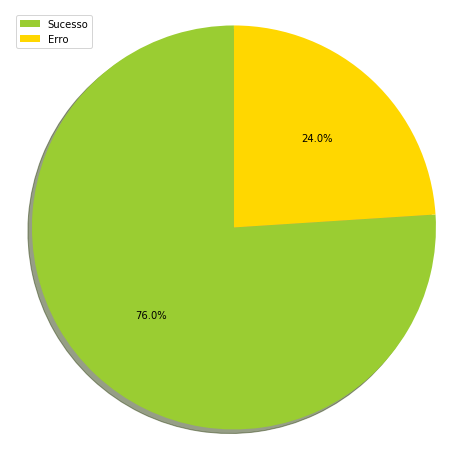

In [4]:
#Percentual de CREATEs
contador_creates = 0
for item in ultima_msg:
    if 'OK' in item or 'onu_business_create' in item or 'voip_create:' in item or 'onu_delete: fsan' in item:
        contador_creates += 1

cruzo_creates = contador_creates*100
resultado_sucesso = cruzo_creates/len(ultima_msg)

#Percentual de ERROR
contador_error = 0
for item in ultima_msg:
    if '"error"' in item:
        contador_error += 1
        
cruzo_error = contador_error*100
resultado_error = cruzo_error/len(ultima_msg)

ocorrencia = {
    'tipo': ['Sucesso', 'Erro'],
    'quantidade': [resultado_sucesso, resultado_error]
}

data_ocorrencia = {
    'Resultado': ['Sucesso', 'Erro'],
    'FSANs': [contador_creates, contador_error]
}

data_ocorrencia = pd.DataFrame(data_ocorrencia)

labels = ocorrencia['tipo']
sizes = ocorrencia['quantidade']
colors = ['yellowgreen', 'gold']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, colors=colors, shadow=True, startangle=90, autopct='%1.1f%%')
ax.legend(labels, loc="best")
ax.axis('equal')
data_ocorrencia

#   

# Quantidade de sucessos por operação

,Função,Quantidade
0,onu_home_create,229
1,onu_delete,46
2,voip_create,3
3,onu_business_create,1


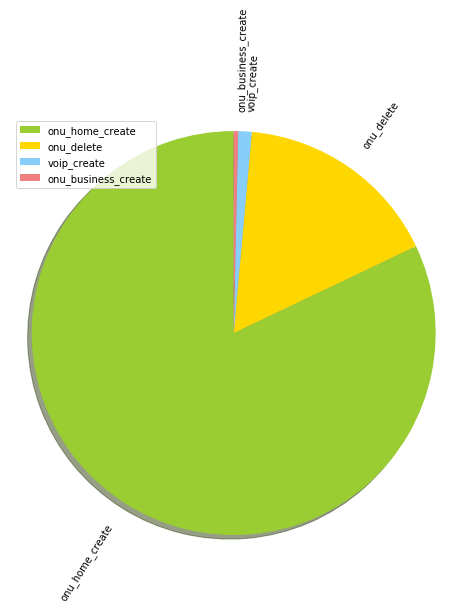

In [5]:
sucessos = []
for x in range(len(ultima_msg)):
    if '"error"' not in ultima_msg[x]:
        corte_sucessos = ultima_msg[x].split()
        sucessos.append(corte_sucessos[0])

lista_sucessos = []
for item in sucessos:
    if item not in lista_sucessos:
        lista_sucessos.append(item)

smart = 0
onu_delete = 0
onu_business_create = 0
voip_create = 0

for item in sucessos:
    if 'smart' in item:
        smart += 1

    elif 'onu_delete:' in item:
        onu_delete += 1

    elif 'onu_business_create:' in item:
        onu_business_create += 1

    elif 'voip_create:' in item:
        voip_create += 1

quantidade_sucessos = {
    'Função': ['onu_home_create', 'onu_delete', 'voip_create', 'onu_business_create'],
    'Quantidade': [smart, onu_delete, voip_create, onu_business_create]
}

quantidade_sucessos = pd.DataFrame(quantidade_sucessos)

labels = quantidade_sucessos['Função']
sizes = quantidade_sucessos['Quantidade']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(sizes, colors=colors, shadow=True, startangle=90, labels=labels, rotatelabels=True)
ax.legend(labels, loc="best")
ax.axis('equal')
quantidade_sucessos

#   

# Quantidade de erros por operação

,Função,Quantidade
0,DELETE,17
1,onu_bridge_path_list,15
2,onu_check_conf_status,8
3,onu_checa_status,7
4,omci_onu_status,7
5,CREATE,4
6,onu_resync_update,2
7,onu_set2default_update,2
8,dslam_fsan_status,2
9,wifi_update,1


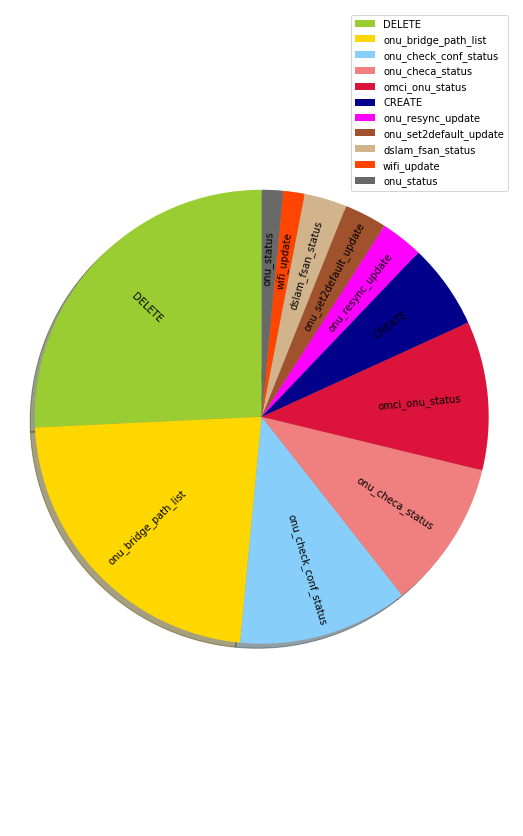

In [6]:
erros = []
for x in range(len(ultima_msg)):
    if '"error"' in ultima_msg[x]:
        corte_erros = ultima_msg[x].split()
        erros.append(corte_erros[0])

lista_erros = []
for item in erros:
    if item not in lista_erros:
        lista_erros.append(item)
        
DELETE = 0
onu_bridge_path_list = 0
onu_resync_update = 0
omci_onu_status = 0
CREATE = 0
wifi_update = 0
onu_status = 0
onu_set2default_update = 0
onu_checa_status = 0
dslam_fsan_status = 0
onu_check_conf_status = 0

for item in erros:
    if 'DELETE' in item:
        DELETE += 1

    elif 'onu_bridge_path_list:' in item:
        onu_bridge_path_list += 1

    elif 'onu_resync_update:' in item:
        onu_resync_update += 1  

    elif 'onu_resync_update:' in item:
        onu_resync_update += 1

    elif 'omci_onu_status:' in item:
        omci_onu_status += 1

    elif 'CREATE' in item:
        CREATE += 1

    elif 'wifi_update:' in item:
        wifi_update += 1

    elif 'onu_status:' in item:
        onu_status += 1  

    elif 'onu_set2default_update:' in item:
        onu_set2default_update += 1

    elif 'onu_checa_status:' in item:
        onu_checa_status += 1

    elif 'dslam_fsan_status:' in item:
        dslam_fsan_status += 1

    elif 'onu_check_conf_status:' in item:
        onu_check_conf_status += 1

quantidade_erros = {
    'Função': [
        'DELETE', 'onu_bridge_path_list', 'onu_check_conf_status', 'onu_checa_status', 
        'omci_onu_status', 'CREATE', 'onu_resync_update', 'onu_set2default_update', 'dslam_fsan_status', 'wifi_update', 'onu_status'
    ],
    'Quantidade': [
        DELETE, onu_bridge_path_list, onu_check_conf_status, onu_checa_status,
        omci_onu_status, CREATE, onu_resync_update, onu_set2default_update, dslam_fsan_status, wifi_update, onu_status
    ]
}

quantidade_erros = pd.DataFrame(quantidade_erros)

labels = quantidade_erros['Função']
sizes = quantidade_erros['Quantidade']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','crimson','darkblue','fuchsia','sienna','tan','orangered','dimgray']
fig, ax = plt.subplots(figsize=(9,15))
ax.pie(sizes, colors=colors, shadow=True, startangle=90, labels=labels, labeldistance=0.7, rotatelabels=True, textprops = dict(rotation_mode = 'anchor', va='center', ha='center'))
ax.legend(labels, loc="best")
ax.axis('equal')
quantidade_erros